In [1]:
import matplotlib.pyplot as plt
import numpy as np # Ya que usaremos algunas de sus funciones ;
import pandas as pd

In [2]:
df = pd.read_csv("../Panda/5.pandas_mergeado.csv", index_col=0)
df.head(1)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018


1. Ayer creamos un par de gráficas para USA y España, donde visualizamos el número de ataques en cada país a lo largo de los años y el tipo de los ataques. Hoy tendréis que hacer dos gráficas con subplots:

1.1 En la primera debéis mostrar los tipos ataques en USA y España, cada subplot corresponderá a un país. Debéis:
- Poner nombre a los ejes de cada uno de los subplots
- Poner un títulos a cada uno de los subplots
- Poner el color de las líneas en negro.
- Establecer el tamaño de la gráfica a 15 x 5
- Ponerle marcadores a las gráficas
- No incluir leyenda

In [21]:
df_us = df[(df["country"]=="USA")]
df_us.head(1)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018


In [33]:
df_us_tipo = pd.DataFrame(df_us.groupby('type')['case_number'].count())
df_us_tipo = df_us_tipo.sort_values('case_number')
df_us_tipo.reset_index(inplace = True)
df_us_tipo.head(4)

,type,case_number
0,Sea Disaster,1
1,Boating,11
2,Invalid,48
3,Provoked,49


In [12]:
df_spain = df[(df["country"]=="SPAIN")]
df_spain.head(1)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
29,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,Lacerations to left foot,26-Aug-2017


In [31]:
df_spain_tipo = pd.DataFrame(df_spain.groupby('type')['case_number'].count())
df_spain_tipo = df_spain_tipo.sort_values('case_number')
df_spain_tipo.reset_index(inplace = True)
df_spain_tipo.head()

,type,case_number
0,Provoked,1
1,Invalid,2
2,Unprovoked,4


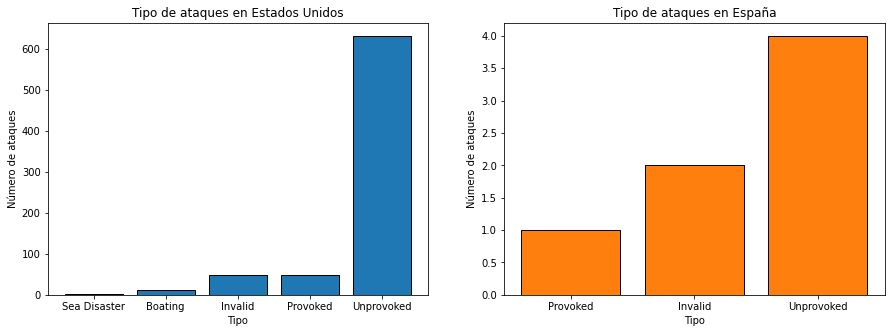

In [38]:
# utilizando los distintos elementos del array "ax" iremos definiendo nuestras gráficas
# establacemos nuestra gráfica que va a estar compuesta por dos figuras
fig,ax = plt.subplots(1,2, figsize=(15,5))

# en el array 0 de nuestro ax querremos la siguiente gráfica
ax[0].bar(df_us_tipo["type"], df_us_tipo["case_number"], color = 'tab:blue', edgecolor= "black")

# en el array 1 de nuestro ax querremos la siguiente gráfica
ax[1].bar(df_spain_tipo["type"], df_spain_tipo["case_number"], color = 'tab:orange', edgecolor= "black")

# para poner los títulos usaremos el método set_title
ax[0].set_title("Tipo de ataques en Estados Unidos")
ax[1].set_title("Tipo de ataques en España")

# cambiamos el nombre de los ejes x e y
ax[0].set_xlabel("Tipo")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Tipo")
ax[1].set_ylabel("Número de ataques")

# mostramos lo que nos devuelve esto: 
plt.show()

1.2 En la segunda debéis mostrar los ataques por año para cada uno de los países.
- De nuevo tendréis que ponerle nombre a los ejes y título a cada gráfica.
- En este caso el subplot deberá tener dos filas y una columna
- No incluir leyenda
- Cambiar el color de las barras

In [61]:
df_spain_año = pd.DataFrame(df_spain.groupby('year')['case_number'].count())
df_spain_año = df_spain_año.sort_values('year')
df_spain_año.reset_index(inplace = True)
df_spain_año.head()

,year,case_number
0,0.0,1
1,1764.0,1
2,1993.0,1
3,2010.0,1
4,2015.0,1


In [60]:
df_us_año = pd.DataFrame(df_us.groupby('year')['case_number'].count())
df_us_año = df_us_año.sort_values('year')
df_us_año.reset_index(inplace = True)
df_us_año.tail()

,year,case_number
71,2014.0,20
72,2015.0,39
73,2016.0,18
74,2017.0,16
75,2018.0,3


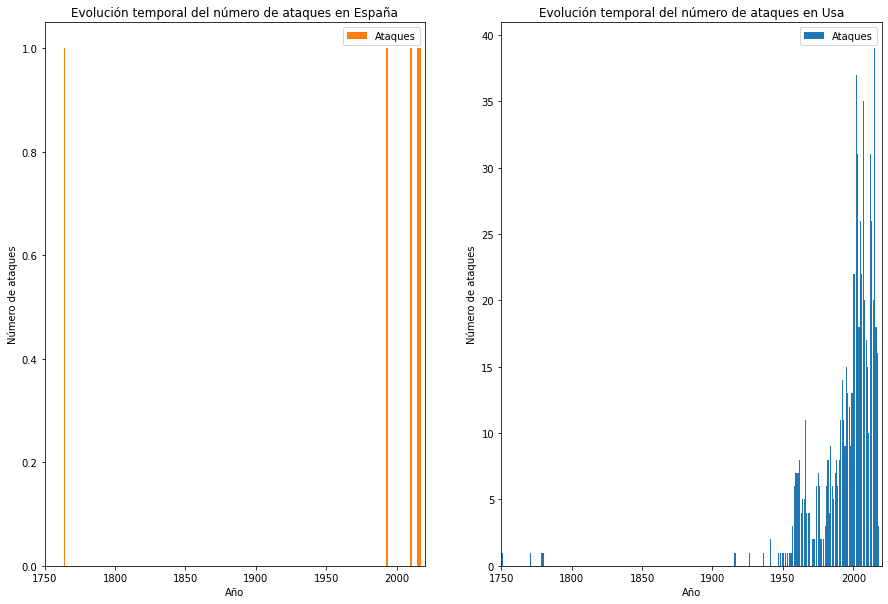

In [62]:
fig,ax = plt.subplots(1,2, figsize = (15,10))

ax[0].bar(df_spain_año["year"], df_spain_año["case_number"], color='tab:orange', label = 'USA')

ax[1].bar(df_us_año["year"], df_us_año["case_number"], color = 'tab:blue')

# en este caso vamos a ampliar los límites de los ejes

ax[0].set_xlim(1750,2020)
ax[1].set_xlim(1750,2020)

# para poner los títulos usaremos el método set_title
ax[0].set_title("Evolución temporal del número de ataques en España")
ax[1].set_title("Evolución temporal del número de ataques en Usa")

# cambiamos el nombre de los ejes x e y

ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de ataques")

#Ponemos la leyenda
ax[0].legend(labels=['Ataques'])
ax[1].legend(labels=['Ataques'])


# mostramos lo que nos devuelve esto: 
plt.show()

#plt.savefig('ataques-por-año.png')

In [ ]:
2. 